In [1]:
!pip install tensorflow==2.0.0-beta0


  Found existing installation: setuptools 40.8.0
    Uninstalling setuptools-40.8.0:
      Successfully uninstalled setuptools-40.8.0
  Running setup.py install for absl-py: started
    Running setup.py install for absl-py: finished with status 'done'
  Running setup.py install for wrapt: started
    Running setup.py install for wrapt: finished with status 'done'
  Running setup.py install for gast: started
    Running setup.py install for gast: finished with status 'done'
  Running setup.py install for termcolor: started
    Running setup.py install for termcolor: finished with status 'done'


You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [14]:
!pip install matplotlib

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [15]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0-beta0


In [17]:
fashion_mnist = keras.datasets.fashion_mnist

In [18]:
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [19]:
train_images.shape


(60000, 28, 28)

In [20]:
class_names= ['T-shirt/top', 'Trouser','Pullover','Dress,','Coat','Sandal','Shirt', 'Sneaker','Bag', 'Ankle boot']

In [21]:
train_images.shape


(60000, 28, 28)

In [22]:
len(train_labels)

60000

In [23]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
test_images.shape

(10000, 28, 28)

In [25]:
len(test_labels)

10000

## Preprocess the data

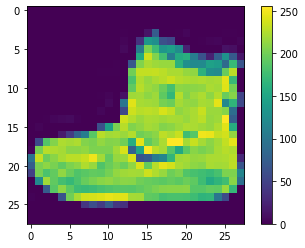

In [26]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
train_images = train_images /255.0
test_images = test_images /255.0

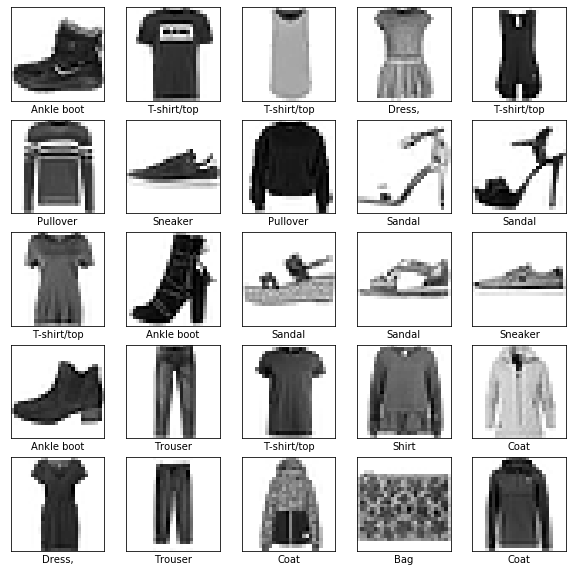

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

# Compile the model

### * Loss function

### * Optimizer

### * Metrics

In [30]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Train the model

In [31]:
model.fit(train_images, train_labels, epochs=10)

W0611 15:19:38.463641  2584 deprecation.py:323] From c:\users\sherap\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4926 - accuracy: 0.8268
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3733 - accuracy: 0.8652
Epoch 3/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3363 - accuracy: 0.8780
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3123 - accuracy: 0.8859
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2937 - accuracy: 0.8918
Epoch 6/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2799 - accuracy: 0.8967
Epoch 7/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2661 - accuracy: 0.9009
Epoch 8/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2557 - accuracy: 0.9050
Epoch 9/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2443 - accuracy: 0.9099
Epoch 10/10
60

# Evaluate accuracy 

In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.3235 - accuracy: 0.8881

Test accuracy: 0.8881


# Make predictions

In [34]:
predictions = model.predict(test_images)

In [35]:
predictions[0]

array([1.8610831e-07, 2.9739540e-09, 1.1480297e-09, 6.7395374e-11,
       2.4888016e-09, 1.7662131e-04, 8.2458357e-08, 2.3329351e-02,
       1.0969276e-05, 9.7648275e-01], dtype=float32)

In [36]:
np.argmax(predictions[0])

9

In [37]:
test_labels[0]

9

In [43]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

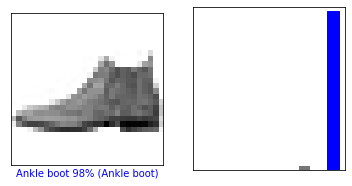

In [44]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

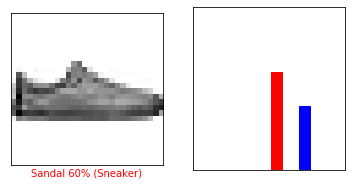

In [45]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

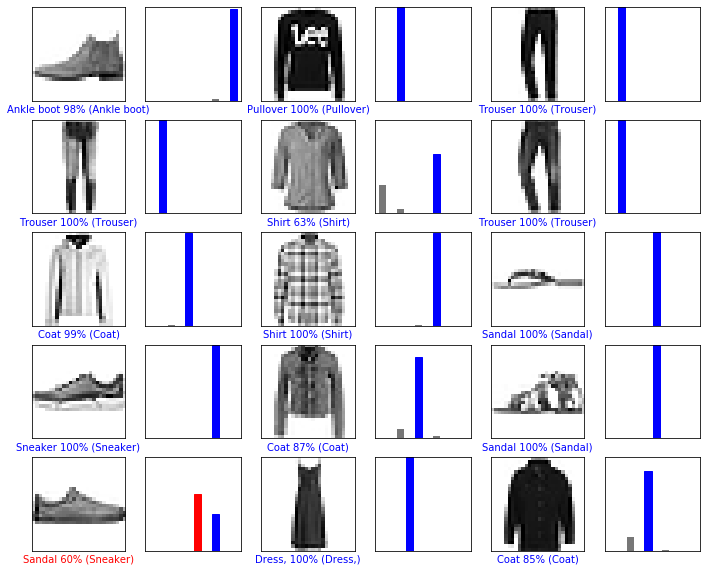

In [46]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [47]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


In [48]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [49]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.8610831e-07 2.9739484e-09 1.1480253e-09 6.7395374e-11 2.4888016e-09
  1.7662114e-04 8.2458044e-08 2.3329321e-02 1.0969276e-05 9.7648275e-01]]


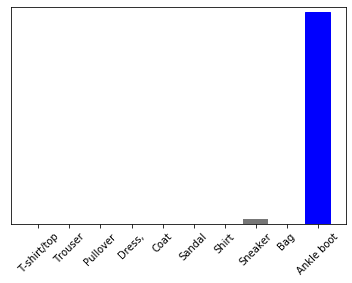

In [50]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)



In [51]:
np.argmax(predictions_single[0])

9